# Dependencies and SetUp

In [1]:
# Dependencies and SetUp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import os

In [2]:
# Load CSV file and display into a DataFrame
emission_csv = os.path.join('Resources','use_tot_realgdp.csv')
emissions_df = pd.read_csv(emission_csv,skiprows=2)
emissions_df.head()

,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,AK,61433,72173,78812,80788,85067,87782,102696,115172,122533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,866594,831311,881239,913155,979212,1044616,1088204,1138573,1246669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,425974,431586,456788,484672,527123,528740,566110,596737,635396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,282993,304835,324913,348302,369663,375200,403460,414501,456156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,3449919,3609108,3724117,3923736,4219633,4385719,4645217,4841003,5115122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean DataFrame to only show years from 2010 to 2019
data_df = emissions_df.drop(emissions_df.columns[1:51],axis=1)
clean_df = data_df.drop(data_df.columns[11:],axis=1)
clean_df.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AK,640590,640731,630464,597975,594764,611996,592550,600982,603064,615132
1,AL,1939211,1913489,1887539,1928525,1964943,1914197,1920148,1901427,1953765,1922823
2,AR,1126614,1128390,1072394,1103707,1119467,1060614,1052290,1056516,1115392,1094729
3,AZ,1428842,1470742,1439496,1458318,1468498,1490141,1520608,1527349,1537185,1550215
4,CA,7656711,7659022,7453762,7538821,7457136,7535674,7662178,7782184,7880187,7802260


In [4]:
# Get CA total Usage
CA_usage = clean_df.loc[clean_df['State'] == 'CA']
CA_usage

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,CA,7656711,7659022,7453762,7538821,7457136,7535674,7662178,7782184,7880187,7802260


In [5]:
CA_usage_clear = CA_usage.drop('State',axis=1)
CA_usage_transpose = CA_usage_clear.T
CA_usage_transpose

,4
2010,7656711
2011,7659022
2012,7453762
2013,7538821
2014,7457136
2015,7535674
2016,7662178
2017,7782184
2018,7880187
2019,7802260


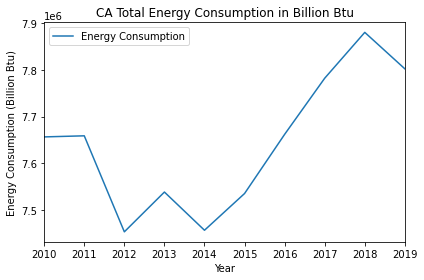

In [6]:
# Plot CA Energy Usage
CA_usage_transpose.plot(kind='line',title='CA Total Energy Consumption in Billion Btu',xlabel='Year',ylabel='Energy Consumption (Billion Btu)')
plt.xticks(range(len(CA_usage_transpose.index)), CA_usage_transpose.index)
plt.legend(['Energy Consumption'])
plt.xlim(0,9)
plt.tight_layout()
plt.savefig('Images/CA Total Energy Consumption in Billions Btu.png')

plt.show()

In [7]:
# Get US Total Usage
USA_usage = clean_df.loc[clean_df['State'] == 'US']
USA_usage

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
51,US,97512536,96866635,94363473,97101305,98270056,97363821,97330844,97602434,101161574,100266080


In [8]:
US_clean = USA_usage.drop('State',axis=1)
US_transpose = US_clean.T

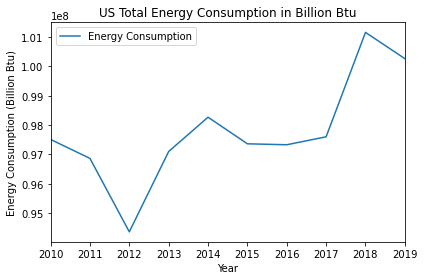

In [9]:
# Plot US Energy Usage
US_transpose.plot(kind='line',title='US Total Energy Consumption in Billion Btu',xlabel='Year',ylabel='Energy Consumption (Billion Btu)')
plt.xticks(range(len(CA_usage_transpose.index)), CA_usage_transpose.index)
plt.legend(['Energy Consumption'])
plt.xlim(0,9)
plt.tight_layout()
plt.savefig('Images/US Total Energy Consumption in Billion Btu.png')

plt.show()

In [10]:
# Plot into a graph to compare usage between US and CA
USA_CA_total_usage = US_transpose.merge(CA_usage_transpose,left_index= True,right_index=True)
USA_CA_total_usage = USA_CA_total_usage.reset_index()
USA_CA_total_usage = USA_CA_total_usage.rename(columns={'index':'year',51:'US',4:'CA'})
USA_CA_total_usage

,year,US,CA
0,2010,97512536,7656711
1,2011,96866635,7659022
2,2012,94363473,7453762
3,2013,97101305,7538821
4,2014,98270056,7457136
5,2015,97363821,7535674
6,2016,97330844,7662178
7,2017,97602434,7782184
8,2018,101161574,7880187
9,2019,100266080,7802260


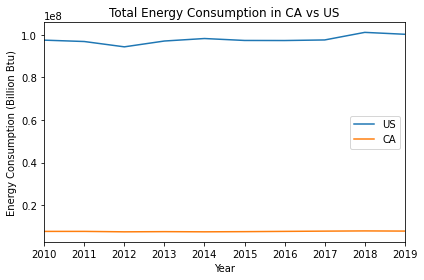

In [11]:
years = USA_CA_total_usage['year']
value_us = USA_CA_total_usage['US']
value_ca = USA_CA_total_usage['CA']

fig, ax = plt.subplots()
ax.plot(years,value_us,label='US')
ax.plot(years,value_ca,label='CA')
ax.set_title('Total Energy Consumption in CA vs US')
ax.set_ylabel('Energy Consumption (Billion Btu)')
ax.set_xlabel('Year')
ax.set_xlim(0,9)
ax.legend()
plt.tight_layout()
plt.savefig('Images/Total Energy Consumption in CA vs US.png')

plt.show()

In [12]:
# Get values for CA and US to calculate percentage
total_value_ca = []
total_value_us = []
percentage = []
rest_percentage=[]

for ca_value in USA_CA_total_usage['CA']:
    total_value_ca.append(ca_value)
for us_value in USA_CA_total_usage['US']:
    total_value_us.append(us_value)
for i in range(len(total_value_us)):
    percentages = (total_value_ca[i]/total_value_us[i])*100
    percentage.append(percentages)
    rest_percentage.append(100)

In [13]:
# Add percentages into new DataFrame
new_data = {'Year':USA_CA_total_usage['year'],'CA Percentage':percentage,
           'US Percentage':rest_percentage}
percentage_df = pd.DataFrame(new_data)
percentage_df

,Year,CA Percentage,US Percentage
0,2010,7.852027,100
1,2011,7.906770,100
2,2012,7.898991,100
3,2013,7.763872,100
4,2014,7.588411,100
5,2015,7.739707,100
6,2016,7.872302,100
7,2017,7.973350,100
8,2018,7.789704,100
9,2019,7.781555,100


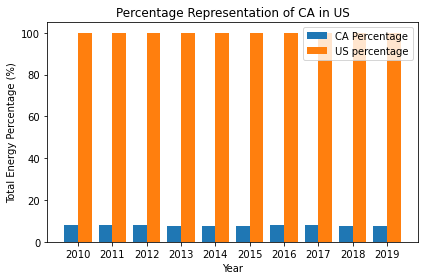

In [14]:
year = percentage_df['Year']
ca_percentage = percentage_df['CA Percentage']
us_percentage = percentage_df['US Percentage']
x_axis = np.arange(len(year))
plt.bar(x_axis-0.2,ca_percentage,0.4, label='CA Percentage')
plt.bar(x_axis+0.2,us_percentage,0.4,label = 'US percentage')
plt.xlabel('Year')
plt.ylabel('Total Energy Percentage (%)')
plt.title('Percentage Representation of CA in US')
plt.xticks(x_axis,year)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Images/Percentage Representation of CA in US')

plt.show()

In [15]:
clean_df_no_US = clean_df.loc[clean_df['State']!= 'US']
clean_df_no_US = clean_df_no_US.transpose()
clean_df_no_US

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
2010,640590,1939211,1126614,1428842,7656711,1520724,770893,190374,256515,4323763,...,375369,2256820,11613222,753481,2524756,155576,2004183,1810211,751123,540857
2011,640731,1913489,1128390,1470742,7659022,1482132,744433,183642,277371,4175877,...,376513,2201541,11833262,790651,2421275,151413,2048341,1797683,737915,557587
2012,630464,1887539,1072394,1439496,7453762,1449604,729271,172778,277310,4074454,...,373499,2086273,11864601,786427,2357496,129223,2008228,1737952,730491,550865
2013,597975,1928525,1103707,1458318,7538821,1481200,747660,174798,276458,4133132,...,388780,2141266,12635929,822442,2423875,137147,2032101,1833064,750915,539824
2014,594764,1964943,1119467,1468498,7457136,1497768,752569,179278,277183,4178123,...,390085,2209079,12635568,794953,2465790,140039,2006565,1889229,780675,536078
2015,611996,1914197,1060614,1490141,7535674,1504228,757383,178219,281784,4329841,...,386363,2184369,12766646,798820,2418404,140301,1994002,1814011,768163,506948
2016,592550,1920148,1052290,1520608,7662178,1473860,725276,174551,279071,4369245,...,384537,2211934,12994812,808333,2378417,134889,2054215,1800265,761782,504910
2017,600982,1901427,1056516,1527349,7782184,1480979,729157,166877,277278,4349501,...,390600,2150054,13180174,828158,2360871,133993,2072728,1817097,752340,534838
2018,603064,1953765,1115392,1537185,7880187,1530859,756938,174538,298329,4445760,...,403020,2237640,14017426,845147,2461091,138563,2051060,1895417,830786,557583


In [16]:
# Switch columns for state row and delete state row
reset_index_df = clean_df_no_US.reset_index()
reset_index_df.columns = reset_index_df.iloc[0]
all_states_df = reset_index_df.drop(reset_index_df.index[[0]])
all_states_df = all_states_df.rename(columns={'State':'Year'})

In [17]:
# Filter to year 2019
all_states_2019_df = all_states_df.loc[all_states_df.index[[9]]]
all_states_2019_df

,Year,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
10,2019,615132,1922823,1094729,1550215,7802260,1576477,736036,167662,296506,...,401702,2170424,14227415,854638,2419077,136864,2076024,1846661,827056,540819


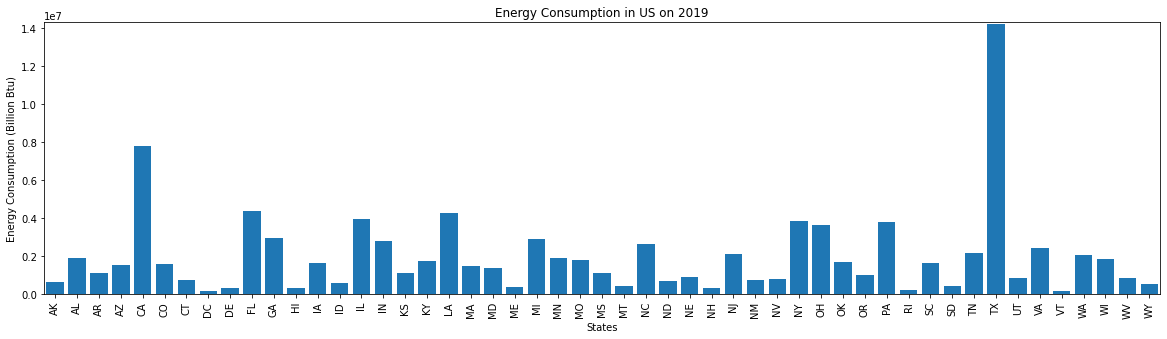

In [18]:
states = all_states_2019_df.columns.tolist()[1:]
no_year_col = all_states_2019_df.drop('Year',axis=1)
val = no_year_col.iloc[0]
plt.figure(figsize=(20,5))
plt.bar(states,val)
plt.xticks(rotation=90)
plt.xlim(-0.5,len(states)-0.5)
plt.ylim(0,14227415+100000)
plt.title('Energy Consumption in US on 2019')
plt.xlabel('States')
plt.ylabel('Energy Consumption (Billion Btu)')
plt.savefig('Images/Energy Consumption in US on 2019.png')

plt.show()
